# Introduction

In this notebook, we'll try to find the leading causes of deaths in the United States.

# Analysis

Importing the required libraries first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

Getting the data into the pandas dataframe.

In [2]:
data = pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States.csv')
df = data.copy()

In [3]:
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


Let's check if the data needs any cleaning.

In [4]:
df.isnull().sum()

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

In [5]:
df.shape

(10296, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 6 columns):
Year                       10296 non-null int64
113 Cause Name             10296 non-null object
Cause Name                 10296 non-null object
State                      10296 non-null object
Deaths                     10296 non-null int64
Age-adjusted Death Rate    10296 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 482.7+ KB


In [7]:
df.dtypes.to_frame('Data Type')

,Data Type
Year,int64
113 Cause Name,object
Cause Name,object
State,object
Deaths,int64
Age-adjusted Death Rate,float64


In [8]:
list(df['113 Cause Name'].unique())

['Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
 'Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)',
 "Alzheimer's disease (G30)",
 'Influenza and pneumonia (J09-J18)',
 'Diabetes mellitus (E10-E14)',
 'Chronic lower respiratory diseases (J40-J47)',
 'Accidents (unintentional injuries) (V01-X59,Y85-Y86)',
 'Cerebrovascular diseases (I60-I69)',
 'Diseases of heart (I00-I09,I11,I13,I20-I51)',
 'Malignant neoplasms (C00-C97)',
 'All Causes']

In [9]:
df.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10296.000000,1.029600e+04,10296.000000
mean,2007.500000,1.536793e+04,128.037383
std,5.188379,1.121457e+05,224.381865
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.060000e+02,19.200000
50%,2007.500000,1.704500e+03,35.800000
75%,2012.000000,5.678000e+03,153.025000
max,2016.000000,2.744248e+06,1087.300000


In [10]:
df.describe(include='O')

,113 Cause Name,Cause Name,State
count,10296,10296,10296
unique,11,11,52
top,Cerebrovascular diseases (I60-I69),Kidney disease,South Carolina
freq,936,936,198


Let's take only the data of United States.

In [11]:
df_US = df[df.State == 'United States']
df_US.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
489,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,29350,10.4
510,1999,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,29199,10.5
535,2001,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,30622,10.7
551,2003,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,31484,10.8
566,2005,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,32637,10.9


Now, let's check the Causes of deaths in the US.

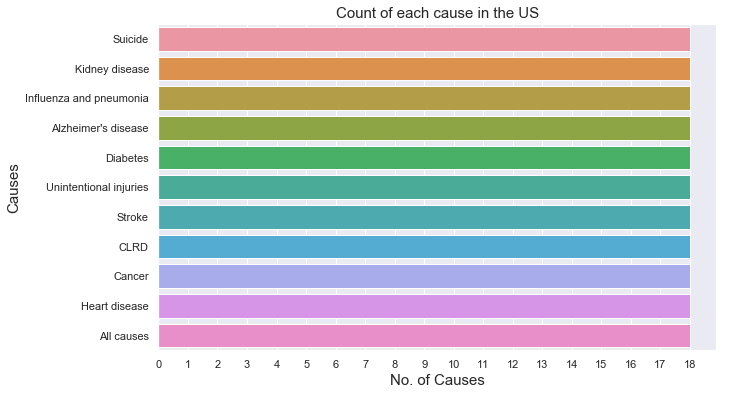

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df_US['Cause Name'])
plt.ylabel('Causes', fontsize=15)
plt.xlabel('No. of Causes', fontsize=15)
plt.xticks(range(0, 19))
plt.title('Count of each cause in the US', fontsize=15)
plt.show()

It seems like all the death causes are equally distributed. Let's check this numerically.

In [13]:
df_US['Cause Name'].value_counts().to_frame('No. of entries')

,No. of entries
CLRD,18
Kidney disease,18
Suicide,18
All causes,18
Heart disease,18
Cancer,18
Unintentional injuries,18
Stroke,18
Diabetes,18
Alzheimer's disease,18


In [14]:
df_US.shape

(198, 6)

Now, let's check which 'Cause' caused more deaths in the US.

In [15]:
df_US_by_cause = df_US.groupby('Cause Name')['Cause Name', 'Deaths'].sum().reset_index()
df_US_by_cause.head()

,Cause Name,Deaths
0,All causes,44915066
1,Alzheimer's disease,1373412
2,CLRD,2434726
3,Cancer,10244536
4,Diabetes,1316379


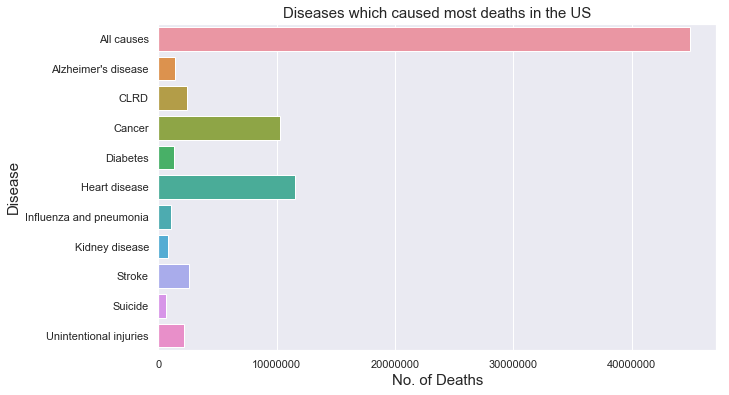

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df_US_by_cause['Cause Name'], x=df_US_by_cause.Deaths)
plt.title('Diseases which caused most deaths in the US', fontsize=15)
plt.xlabel('No. of Deaths', fontsize=15)
plt.ylabel('Disease', fontsize=15)
plt.ticklabel_format(style='plain', axis='x')  # Turning off the scientific notation
plt.show()

Apart from 'All Causes', we can see that heart disease and cancer are among the most prevalent causes of deaths in the United States.

Let's check yearly now.

In [17]:
 # Calculate the percentage change in deaths
df_US.Deaths = df_US.Deaths.pct_change()

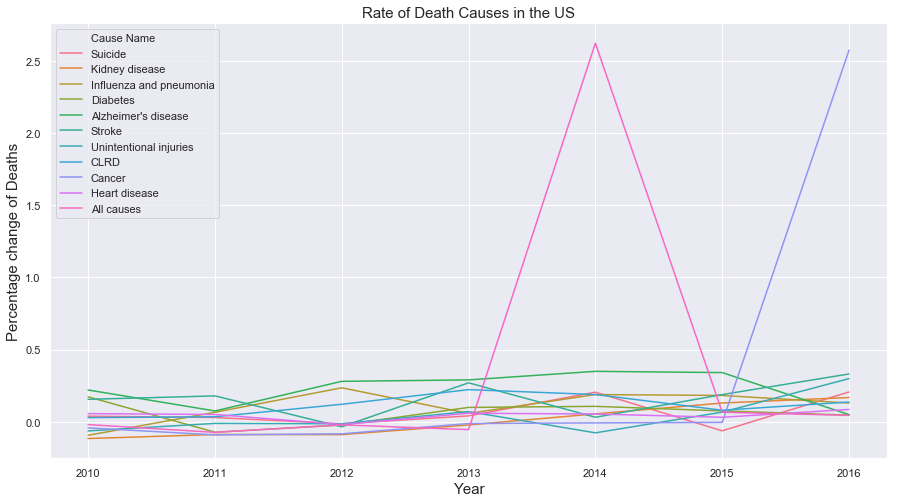

In [18]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Deaths',
             hue='Cause Name', estimator='median', data=df_US[df_US.Year >= 2010])
plt.title('Rate of Death Causes in the US', fontsize=15)
plt.ylabel('Percentage change of Deaths', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.show()

We can see that 'Cancer' started increasing in 2015. And 'All Causes' started increasing in 2013 but started declining in 2014. All other causes show similar trend each passing year.